In [599]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [600]:
img = cv2.imread('./park.jpg')
# img = cv2.medianBlur(img, 21)
# img = cv2.resize(img, (int(img.shape[1]/30), int(img.shape[0]/30)))
luv_img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
mean_img = luv_img.copy()
mean_img.shape
mean_img = mean_img.astype(np.float32)

In [601]:
def find_neighbours(all_points, point, window_size):
    return set(zip(*np.where(np.sum(np.abs(all_points - point, dtype=np.float32) ** 2, axis = -1) ** 1./point.shape[0]
                    <= window_size)))

def mean_shift_step(all_points, point, window_size):
        ind = find_neighbours(all_points=all_points, point=point, window_size=window_size)
        new_mean = np.mean(all_points[tuple(np.array(list(ind)).T)], axis=0, dtype=np.float32)
        return new_mean

In [602]:
window_size = 20

In [604]:
neighbouring_points = ()
mapped_centroid = {}
max_iter = 100
for row in range(luv_img.shape[0]):
    print(row)
    for col in range(luv_img.shape[1]):
        if  mapped_centroid.get((row, col)) is not None:
            mean_img[row, col] =  mapped_centroid[(row, col)]
            continue
        points = set()
        difference = float('inf')
        mean = luv_img[row, col].astype(np.float32)
        iter_count = max_iter
        while difference >= 1e-2 and iter_count > 0:
            points = points.union(find_neighbours(luv_img, mean, float(window_size/5)))
            new_mean = mean_shift_step(luv_img, mean, window_size)
            difference = np.sum(np.abs(new_mean-mean)**2) ** 0.5
            mean = new_mean
            iter_count -= 1
        for p in points:
            mapped_centroid[p] = mean
        mean_img[row, col] = mean


0


KeyboardInterrupt: 

In [ ]:

centroids = list()
mean_test = mean_img.copy()
def does_centroid_exists(X, radius=1000):
    for c in centroids:
        if np.sum((X-c)**2) < radius ** 1./3:
            return c
    return None
    
for row in range(mean_img.shape[0]):
    for col in range(mean_img.shape[1]):
        c = does_centroid_exists(mean_img[row, col])
        if c is None:
            centroids.append(np.uint32(mean_img[row, col]))
            continue
        mean_img[row, col] = c


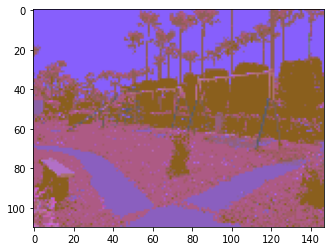

In [ ]:
plt.imshow(cv2.cvtColor(mean_img.astype(np.uint8), cv2.COLOR_BGR2RGB))

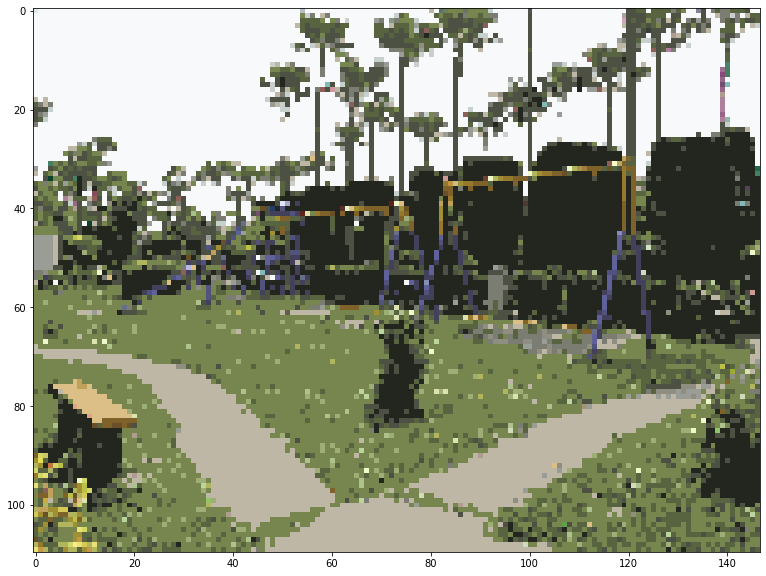

In [ ]:
centroids = np.unique(mean_img.reshape(-1, 3), axis=0)
recunstruced_img = np.sum(mean_img, axis=-1)
segmented= mean_img.copy()
for c in centroids:
    cost = np.sum(c)
    mean_color = np.mean(img[recunstruced_img == cost], axis=0)
    segmented[recunstruced_img == cost] = mean_color

fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(cv2.cvtColor(segmented.astype(np.uint8), cv2.COLOR_BGR2RGB))

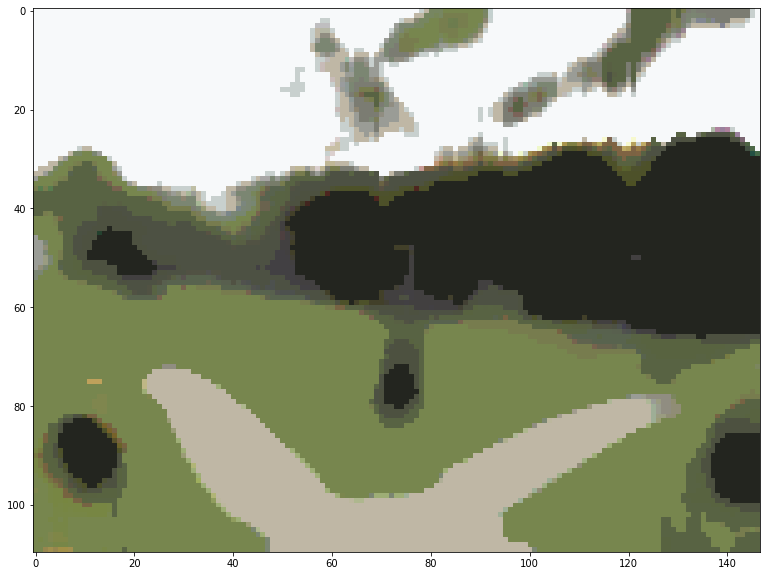

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(cv2.cvtColor(cv2.medianBlur(segmented.astype(np.uint8), 11), cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('./res04.jpg', segmented)
cv2.imwrite('./res04-with_median.jpg', cv2.medianBlur(segmented.astype(np.uint8), 11))

True